In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df['target'] = y

df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
# check missing values
df.isnull().sum()


age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [4]:
#normalize feature
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


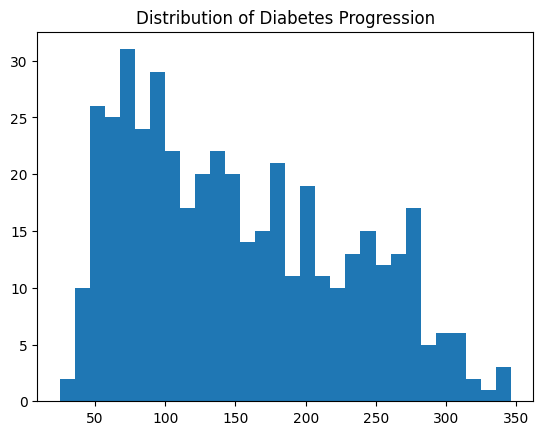

In [5]:
# target distribution
plt.hist(y, bins=30)
plt.title("Distribution of Diabetes Progression")
plt.show()


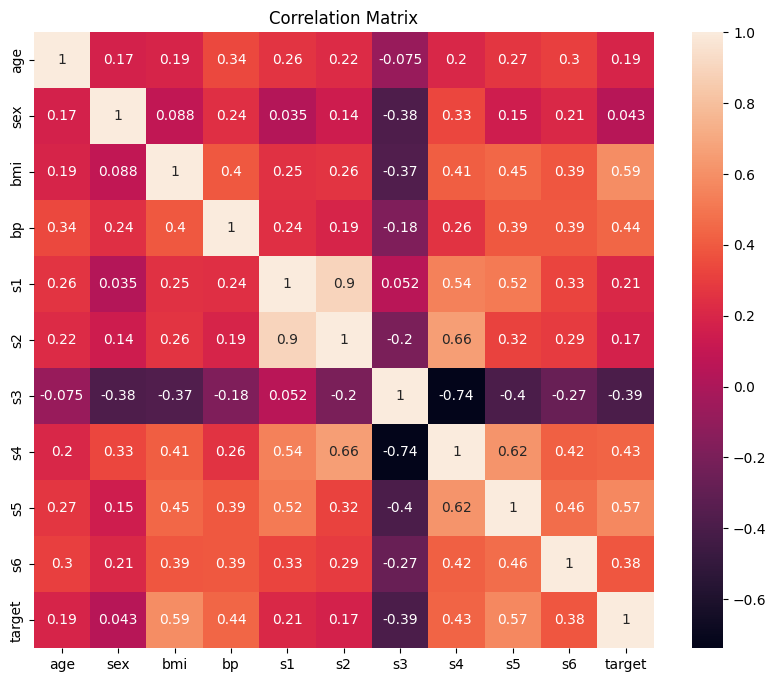

In [6]:
# correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [7]:
# ANN model
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(10,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

model.summary()


c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [9]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 30503.1914 - mae: 155.5289 - val_loss: 20108.3633 - val_mae: 125.1316
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 23194.5820 - mae: 131.3585 - val_loss: 10847.3535 - val_mae: 84.3471
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8326.4131 - mae: 68.8600 - val_loss: 4427.2085 - val_mae: 51.6884
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4764.6084 - mae: 55.7114 - val_loss: 3763.5903 - val_mae: 45.2884
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3875.2446 - mae: 48.4462 - val_loss: 3452.8538 - val_mae: 43.1940
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3465.6760 - mae: 46.2512 - val_loss: 3217.9653 - val_mae: 42.6065
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3238.0906 - mae: 45.0085 - val_loss: 3161.5168 - val_mae: 42.8984
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3082.4609 - mae: 44.1650 - val_loss: 3072.2126 - va

In [10]:
y_pred = model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 2720.7600479948683
R2 Score: 0.48646996591657876


In [12]:
# improved model
improved_model = Sequential()

improved_model.add(Dense(64, activation='relu', input_shape=(10,)))
improved_model.add(Dense(32, activation='relu'))
improved_model.add(Dense(16, activation='relu'))
improved_model.add(Dense(1))

improved_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

history2 = improved_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)


c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 31355.1094 - mae: 158.1941 - val_loss: 22260.6289 - val_mae: 133.3096
Epoch 2/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 31003.3359 - mae: 157.1642 - val_loss: 21889.5840 - val_mae: 132.0103
Epoch 3/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30270.7617 - mae: 155.0214 - val_loss: 21122.6562 - val_mae: 129.3055
Epoch 4/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 28772.3125 - mae: 150.6080 - val_loss: 19672.3594 - val_mae: 124.0808
Epoch 5/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26082.0879 - mae: 142.0979 - val_loss: 17039.1973 - val_mae: 114.1849
Epoch 6/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21001.6914 - mae: 125.4422 - val_loss: 12829.1445 - val_mae: 96.1819
Epoch 7/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14109.8789 - mae: 98.0805 - val_loss: 7715.7773 - val_mae: 68.1412
Epoch 8/150
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7615.2422 - mae: 67.6769 - val_los

In [13]:
y_pred2 = improved_model.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Improved Model MSE:", mse2)
print("Improved Model R2:", r2_2)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Improved Model MSE: 2706.6175652737447
Improved Model R2: 0.4891392897473058


In [14]:
#############################################################################################################################

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

improved_model = Sequential()

improved_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
improved_model.add(Dropout(0.2))

improved_model.add(Dense(32, activation='relu'))
improved_model.add(Dropout(0.1))

improved_model.add(Dense(1))  # regression output

improved_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

improved_model.summary()


c:\Users\user\Desktop\Data_Science\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)


In [18]:
history = improved_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 31340.1641 - mae: 158.0836 - val_loss: 22177.8945 - val_mae: 133.0318
Epoch 2/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30962.7168 - mae: 156.9660 - val_loss: 21828.1543 - val_mae: 131.8348
Epoch 3/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 30419.3223 - mae: 155.3636 - val_loss: 21268.3730 - val_mae: 129.9042
Epoch 4/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 29486.9043 - mae: 152.6110 - val_loss: 20405.3477 - val_mae: 126.8870
Epoch 5/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28065.0605 - mae: 148.3158 - val_loss: 19169.2617 - val_mae: 122.5138
Epoch 6/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26036.3516 - mae: 142.2146 - val_loss: 17494.6504 - val_mae: 116.4181
Epoch 7/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 23404.1230 - mae: 133.5934 - val_loss: 15386.8271 - val_mae: 108.2463
Epoch 8/300
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20087.5020 - mae: 122.3379 - v

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred2 = improved_model.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Improved Model MSE:", mse2)
print("Improved Model R2:", r2_2)


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021C82B9DEE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Improved Model MSE: 2909.031510189126
Improved Model R2: 0.45093465641039654


In [20]:
#####################################################################################################################